# ***ANÁLISIS Y SIMULACIÓN II***

##**1. CARGA DE LIBRERIAS Y/O DEPENDENCIAS**

In [47]:
# Manipulación de Datos
import pandas as pd
import numpy as np
import json

# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de Datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Bibliotecas de Machine Learning (ML)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.pipeline import Pipeline

# Evaluación de Modelos
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve
  )

# División de Datos y Validación Cruzada
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.preprocessing import LabelBinarizer

# Reducción de dimensionalidad
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, mutual_info_classif

# Verificar si la librería 'openml' está instalada, y si no, instalarla
import importlib.util
import subprocess
import sys

package_name = "openml"

# Comprobar si el paquete está instalado
if importlib.util.find_spec(package_name) is None:
    print(f"La librería '{package_name}' no está instalada. Instalando...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
else:
    print(f"La librería '{package_name}' ya está instalada.")

import openml

La librería 'openml' ya está instalada.


## **2. CARGA DE DATOS**

In [2]:
# Cargar el dataset desde OpenML
dataset = openml.datasets.get_dataset(1044, download_all_files=True)

# Obtener los datos en forma de DataFrame
X, y, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute,
    dataset_format="dataframe"
)


/tmp/ipython-input-1458203460.py:2: FutureWarning: ``download_all_files`` is experimental and is likely to break with new releases.
  dataset = openml.datasets.get_dataset(1044, download_all_files=True)


## **3. ANÁLISIS EXPLORATORIO Y TRANSFORMACIÓN DE DATOS**

In [ ]:
# Estructura de los características predictivas
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10936 entries, 0 to 10935
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   lineNo           10936 non-null  int64   
 1   assgNo           10936 non-null  int64   
 2   fixcount         10936 non-null  uint8   
 3   firstPassCnt     10936 non-null  uint8   
 4   P1stFixation     10936 non-null  category
 5   P2stFixation     10936 non-null  category
 6   prevFixDur       10936 non-null  int64   
 7   firstfixDur      10936 non-null  int64   
 8   firstPassFixDur  10936 non-null  int64   
 9   nextFixDur       10936 non-null  int64   
 10  firstSaccLen     10936 non-null  float64 
 11  lastSaccLen      10936 non-null  float64 
 12  prevFixPos       10936 non-null  float64 
 13  landingPos       10936 non-null  float64 
 14  leavingPos       10936 non-null  float64 
 15  totalFixDur      10936 non-null  int64   
 16  meanFixDur       10936 non-null  float64

In [ ]:
# Verificar la longitud de los datos

print(f"Dimensiones de X: {X.shape}")
print(f"Longitud de y: {len(y)}")
print(f"Variable objetivo: {dataset.default_target_attribute}")


Dimensiones de X: (10936, 27)
Longitud de y: 10936
Variable objetivo: label


In [ ]:
def analisis_faltantes_distribucion(X, y):
    """
    Realiza un análisis básico del dataset:
      - Muestra cantidad de valores faltantes en X y y
      - Muestra distribución de clases (conteo y porcentaje)
      - Genera heatmap de valores faltantes solo si existen
      - Genera gráfico de distribución de clases
    """

    sns.set_theme(style="whitegrid")

    missing_X = X.isnull().sum().sum()
    missing_y = y.isnull().sum()

    print("\n Verificando valores faltantes:")
    print(f"{missing_X} valores faltantes en X")
    print(f"{missing_y} valores faltantes en y")

    print("\n Distribución de clases en la variable objetivo:")
    print(y.value_counts())

    print("\n Porcentaje por clase:")
    print((y.value_counts(normalize=True) * 100).round(2))

    if missing_X > 0 or missing_y > 0:
        plt.figure(figsize=(7, 5), dpi=120)
        sns.heatmap(X.isnull(), cbar=False, yticklabels=False, cmap="crest")
        plt.title("Mapa de calor de valores faltantes en X", fontsize=12, fontweight="bold")
        plt.xlabel("Características")
        plt.tight_layout()
        plt.show()
    else:
        print("\n No se encontraron valores faltantes. No se genera gráfico de NaN.")

    counts = y.value_counts()
    percentages = (y.value_counts(normalize=True) * 100).round(2)
    order = counts.index

    plt.figure(figsize=(4.2, 2.8), dpi=120)
    ax = sns.countplot(
        x=y,
        order=order,
        palette="viridis"
    )

    ax.grid(False)
    ax.tick_params(axis="x", labelsize=8)
    ax.tick_params(axis="y", labelsize=8)

    # Títulos
    ax.set_title("Distribución de la variable objetivo", fontsize=12, fontweight="bold", pad=12)
    ax.set_xlabel("Clase", fontsize=8)
    ax.set_ylabel("Frecuencia", fontsize=8)

    # Etiquetas de conteo + porcentaje
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        clase = order[i]
        pct = percentages[clase]
        ax.annotate(
            f"{height}\n({pct}%)",
            (p.get_x() + p.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=6,
            xytext=(0, 2),
            textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()


 Verificando valores faltantes:
0 valores faltantes en X
0 valores faltantes en y

 Distribución de clases en la variable objetivo:
label
1    4262
0    3804
2    2870
Name: count, dtype: int64

 Porcentaje por clase:
label
1    38.97
0    34.78
2    26.24
Name: proportion, dtype: float64

 No se encontraron valores faltantes. No se genera gráfico de NaN.


/tmp/ipython-input-1206543337.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


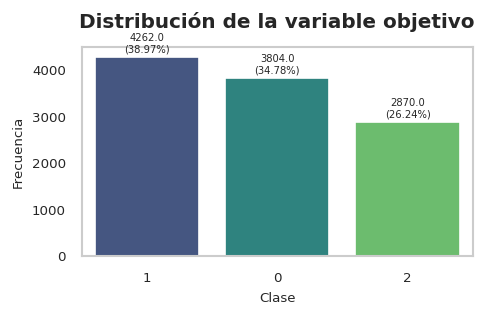

In [ ]:
analisis_faltantes_distribucion(X, y)

In [ ]:
def resumen_valores_unicos_columna(df: pd.DataFrame, mostrar: bool = True) -> pd.DataFrame:
    """
    Genera un resumen con los valores únicos y el número de valores únicos
    por columna en un DataFrame.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame a analizar.
    mostrar : bool, opcional
        Si True, muestra el DataFrame resultante con display().

    Retorna
    -------
    pd.DataFrame
        DataFrame con dos columnas:
        - 'Valores únicos': lista con los valores únicos por columna.
        - 'Número de valores únicos': cantidad de valores distintos.
    """

    resumen = pd.concat({
        "Valores únicos": df.apply(pd.unique),
        "Número de valores únicos": df.nunique()
    }, axis=1)

    if mostrar:
        pd.set_option('display.max_rows', None)
        display(resumen)

    return resumen

In [ ]:
resumen_valores_unicos_columna = resumen_valores_unicos_columna(X)

,Valores únicos,Número de valores únicos
lineNo,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",10936
assgNo,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",336
fixcount,"[1, 2, 3, 4, 6, 5, 8, 12]",8
firstPassCnt,"[1, 2, 3, 4, 6, 5, 8]",7
P1stFixation,"['1', '0'] Categories (2, object): ['0' < '1']",2
P2stFixation,"['0', '1'] Categories (2, object): ['0' < '1']",2
prevFixDur,"[0, 99, 278, 159, 139, 239, 258, 100, 298, 179...",61
firstfixDur,"[100, 278, 159, 139, 239, 258, 338, 179, 318, ...",63
firstPassFixDur,"[100, 278, 159, 139, 239, 258, 338, 179, 318, ...",111
nextFixDur,"[99, 159, 139, 239, 258, 100, 338, 298, 318, 2...",68


In [ ]:
def detectar_tipos_columnas(df: pd.DataFrame, target: str | None = None, mostrar: bool = True):
    """
    Detecta y separa las columnas del DataFrame por tipo de dato,
    excluyendo opcionalmente la variable objetivo.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame de entrada.
    target : str | None, opcional
        Nombre de la columna objetivo a excluir (por ejemplo 'RENDIMIENTO_GLOBAL').
    mostrar : bool, opcional
        Si True, imprime un resumen con las columnas detectadas.

    Retorna
    -------
    tuple
        (num_cols, cat_cols, date_cols)
    """

    df_aux = df.copy()

    # Excluir la variable objetivo si existe
    if target and target in df_aux.columns:
        df_aux = df_aux.drop(columns=[target])
        if mostrar:
            print(f"Variable objetivo '{target}' excluida del análisis.\n")

    # Detectar columnas por tipo
    num_cols = df_aux.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df_aux.select_dtypes(include=['object', 'category', 'string', 'bool']).columns.tolist()
    date_cols = df_aux.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()

    if mostrar:
        print("Columnas numéricas:", num_cols)
        print("Columnas categóricas:", cat_cols)
        print("Columnas de fecha:", date_cols)
        print(f"\nResumen → Numéricas: {len(num_cols)}, Categóricas: {len(cat_cols)}, Fechas: {len(date_cols)}")

    return num_cols, cat_cols, date_cols

In [ ]:
num_cols_train, cat_cols_train, date_cols_train = detectar_tipos_columnas(X, target=None)

Columnas numéricas: ['lineNo', 'assgNo', 'fixcount', 'firstPassCnt', 'prevFixDur', 'firstfixDur', 'firstPassFixDur', 'nextFixDur', 'firstSaccLen', 'lastSaccLen', 'prevFixPos', 'landingPos', 'leavingPos', 'totalFixDur', 'meanFixDur', 'nRegressFrom', 'regressLen', 'regressDur', 'pupilDiamMax', 'pupilDiamLag', 'timePrtctg', 'nWordsInTitle', 'titleNo', 'wordNo']
Columnas categóricas: ['P1stFixation', 'P2stFixation', 'nextWordRegress']
Columnas de fecha: []

Resumen → Numéricas: 24, Categóricas: 3, Fechas: 0


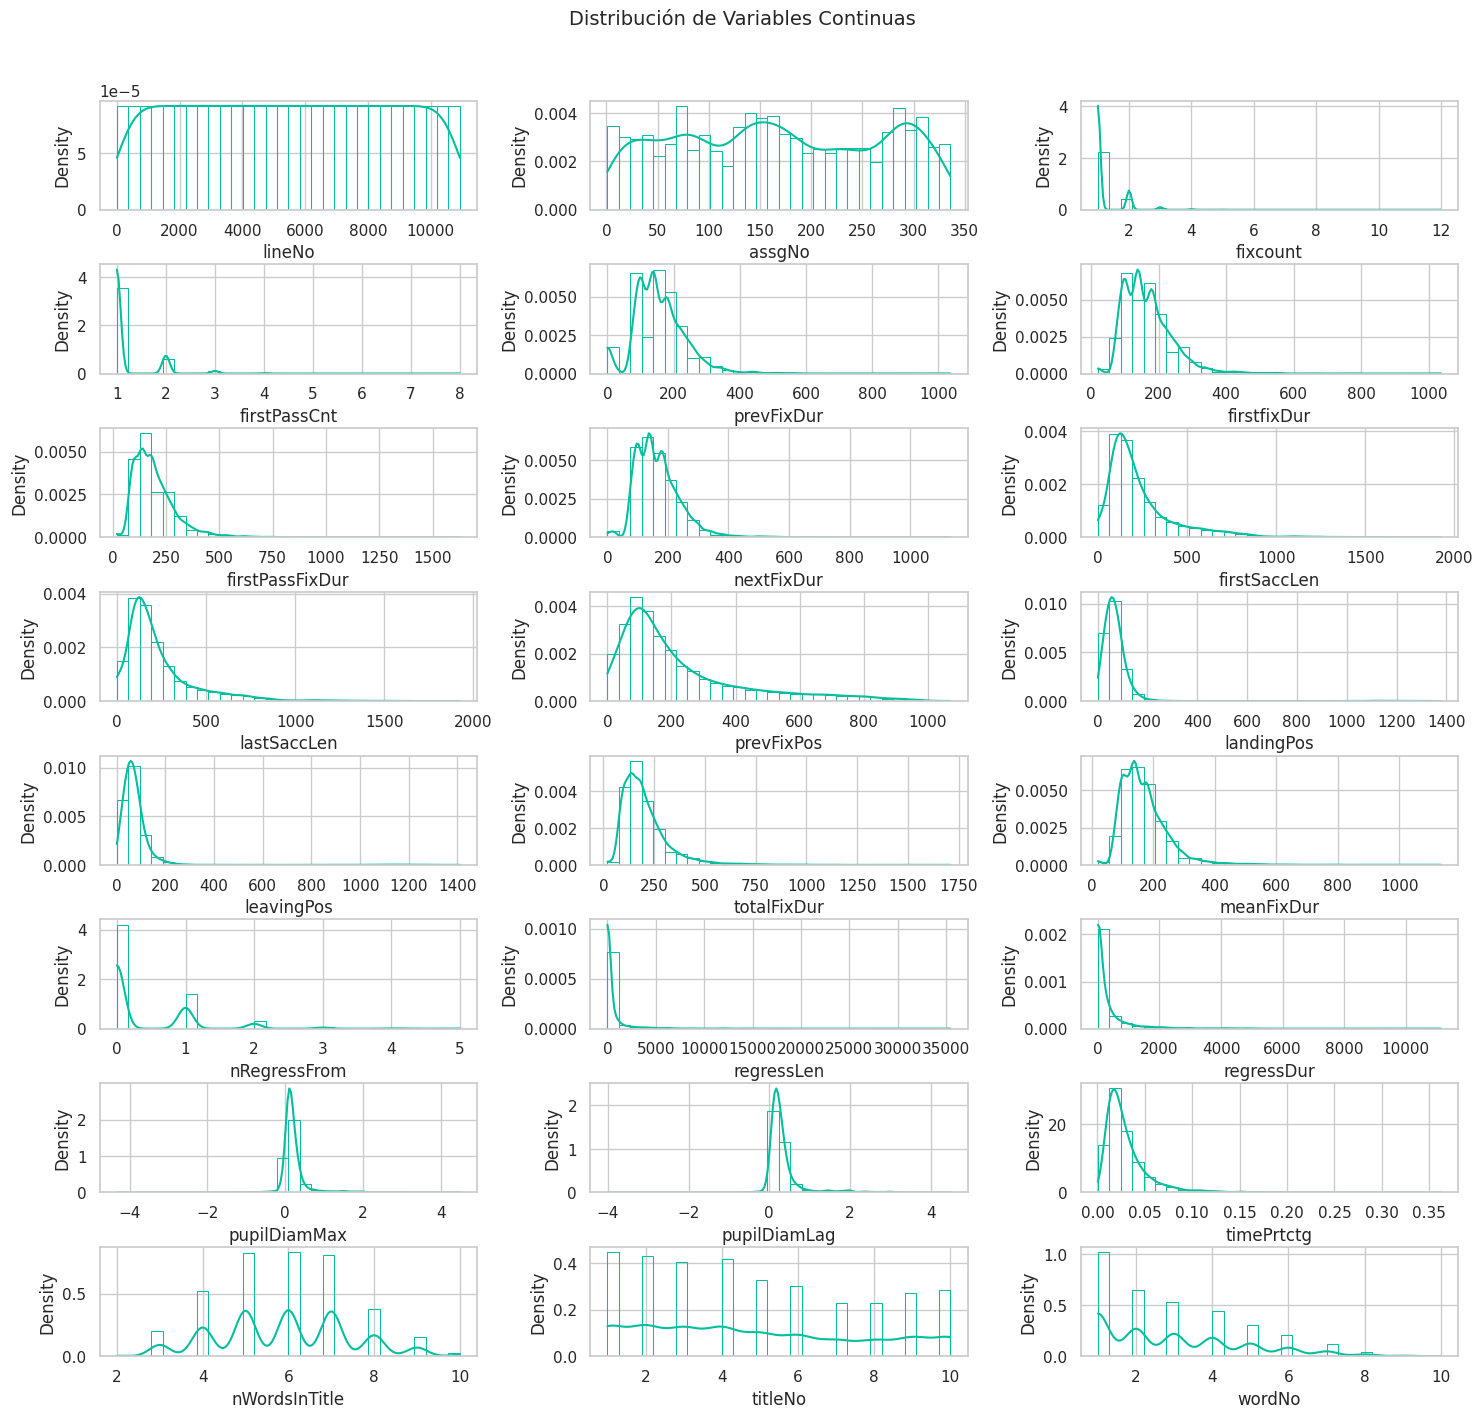

In [ ]:
def plot_distribucion_variables_continuas(df, numeric_cols):
    """
    Genera histogramas compactos para las columnas con valores continuos.
    """
plt.figure(figsize = (15, 20))
plt.suptitle("Distribución de Variables Continuas", y=1.01, fontsize=14)

# Creamos un dataframe con las variables continuas
df_filtered = X[num_cols_train].copy()

# Graficamos la distribución de todas las variables
n_cols = len(df_filtered.columns)
n_rows = (n_cols + 1) // 2
for i, j in enumerate(df_filtered.columns):
    plt.subplot(n_rows, 3, i+1)
    sns.histplot(x = j, data = df_filtered,
                stat = 'density',  kde = True, bins = 30,
                color = '#04BF9D', fill = False)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

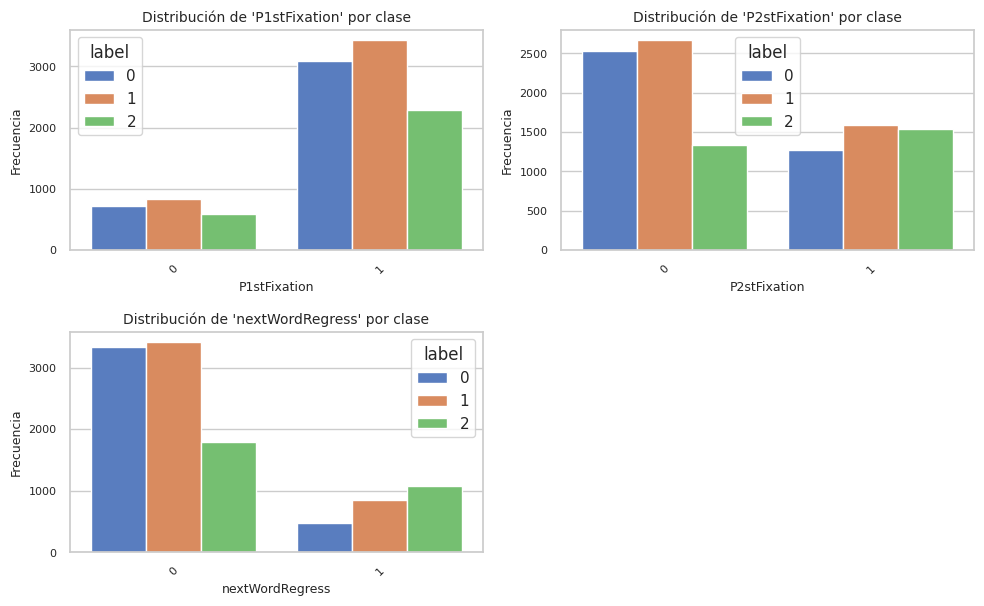

In [ ]:
def plot_distribucion_variables_categoricas(df, numeric_cols):
    """
    Genera histogramas compactos para las columnas con valores categóricos.
    """
n_rows = (n_cols + 1) // 2
plt.figure(figsize=(10, 3 * n_rows))

for i, col in enumerate(cat_cols_train, 1):
    plt.subplot(n_rows, 2, i)
    sns.countplot(data=X, x=col, hue=y, palette="muted")
    plt.title(f"Distribución de '{col}' por clase", fontsize=10)
    plt.xlabel(col, fontsize=9)
    plt.ylabel("Frecuencia", fontsize=9)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

plt.show()

In [ ]:
def graficar_matriz_correlacion(df: pd.DataFrame,
                                metodo: str = "pearson",
                                titulo: str = None,
                                anotar: bool = True) -> pd.DataFrame:
    """
    Calcula y grafica la matriz de correlación de las columnas numéricas de un DataFrame.

    Parámetros
    ----------
    df : pd.DataFrame
        Conjunto de datos ya mapeado o codificado numéricamente.
    metodo : {'pearson','spearman','kendall'}
        Tipo de correlación a usar.
    excluir : list
        Columnas a excluir (por ejemplo identificadores).
    titulo : str
        Título del gráfico.
    anotar : bool
        Si True muestra valores sobre el mapa (solo recomendable si hay pocas columnas).

    Retorna
    -------
    pd.DataFrame
        Matriz de correlación calculada.
    """
    # columnas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if len(num_cols) < 2:
        print("No hay suficientes columnas numéricas para correlación.")
        return pd.DataFrame()

    # matriz de correlación
    corr = df[num_cols].corr(method=metodo).round(2)

    # tamaño de la figura
    n = len(num_cols)
    figsize = (min(1.0 * n, 20), min(0.8 * n, 20))
    plt.figure(figsize=figsize)

    # máscara para ocultar triángulo superior
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    # mapa de calor
    sns.heatmap(corr,
                vmin=-1, vmax=1,
                annot=(anotar and n <= 25),
                fmt=".2f",
                cmap="BrBG",
                mask=mask,
                square=True,
                cbar_kws={"shrink": .8})

    plt.title(titulo or f"Matriz de correlación ({metodo.capitalize()})", y=1.02, fontsize=13)
    plt.tight_layout()
    plt.show()

    return corr

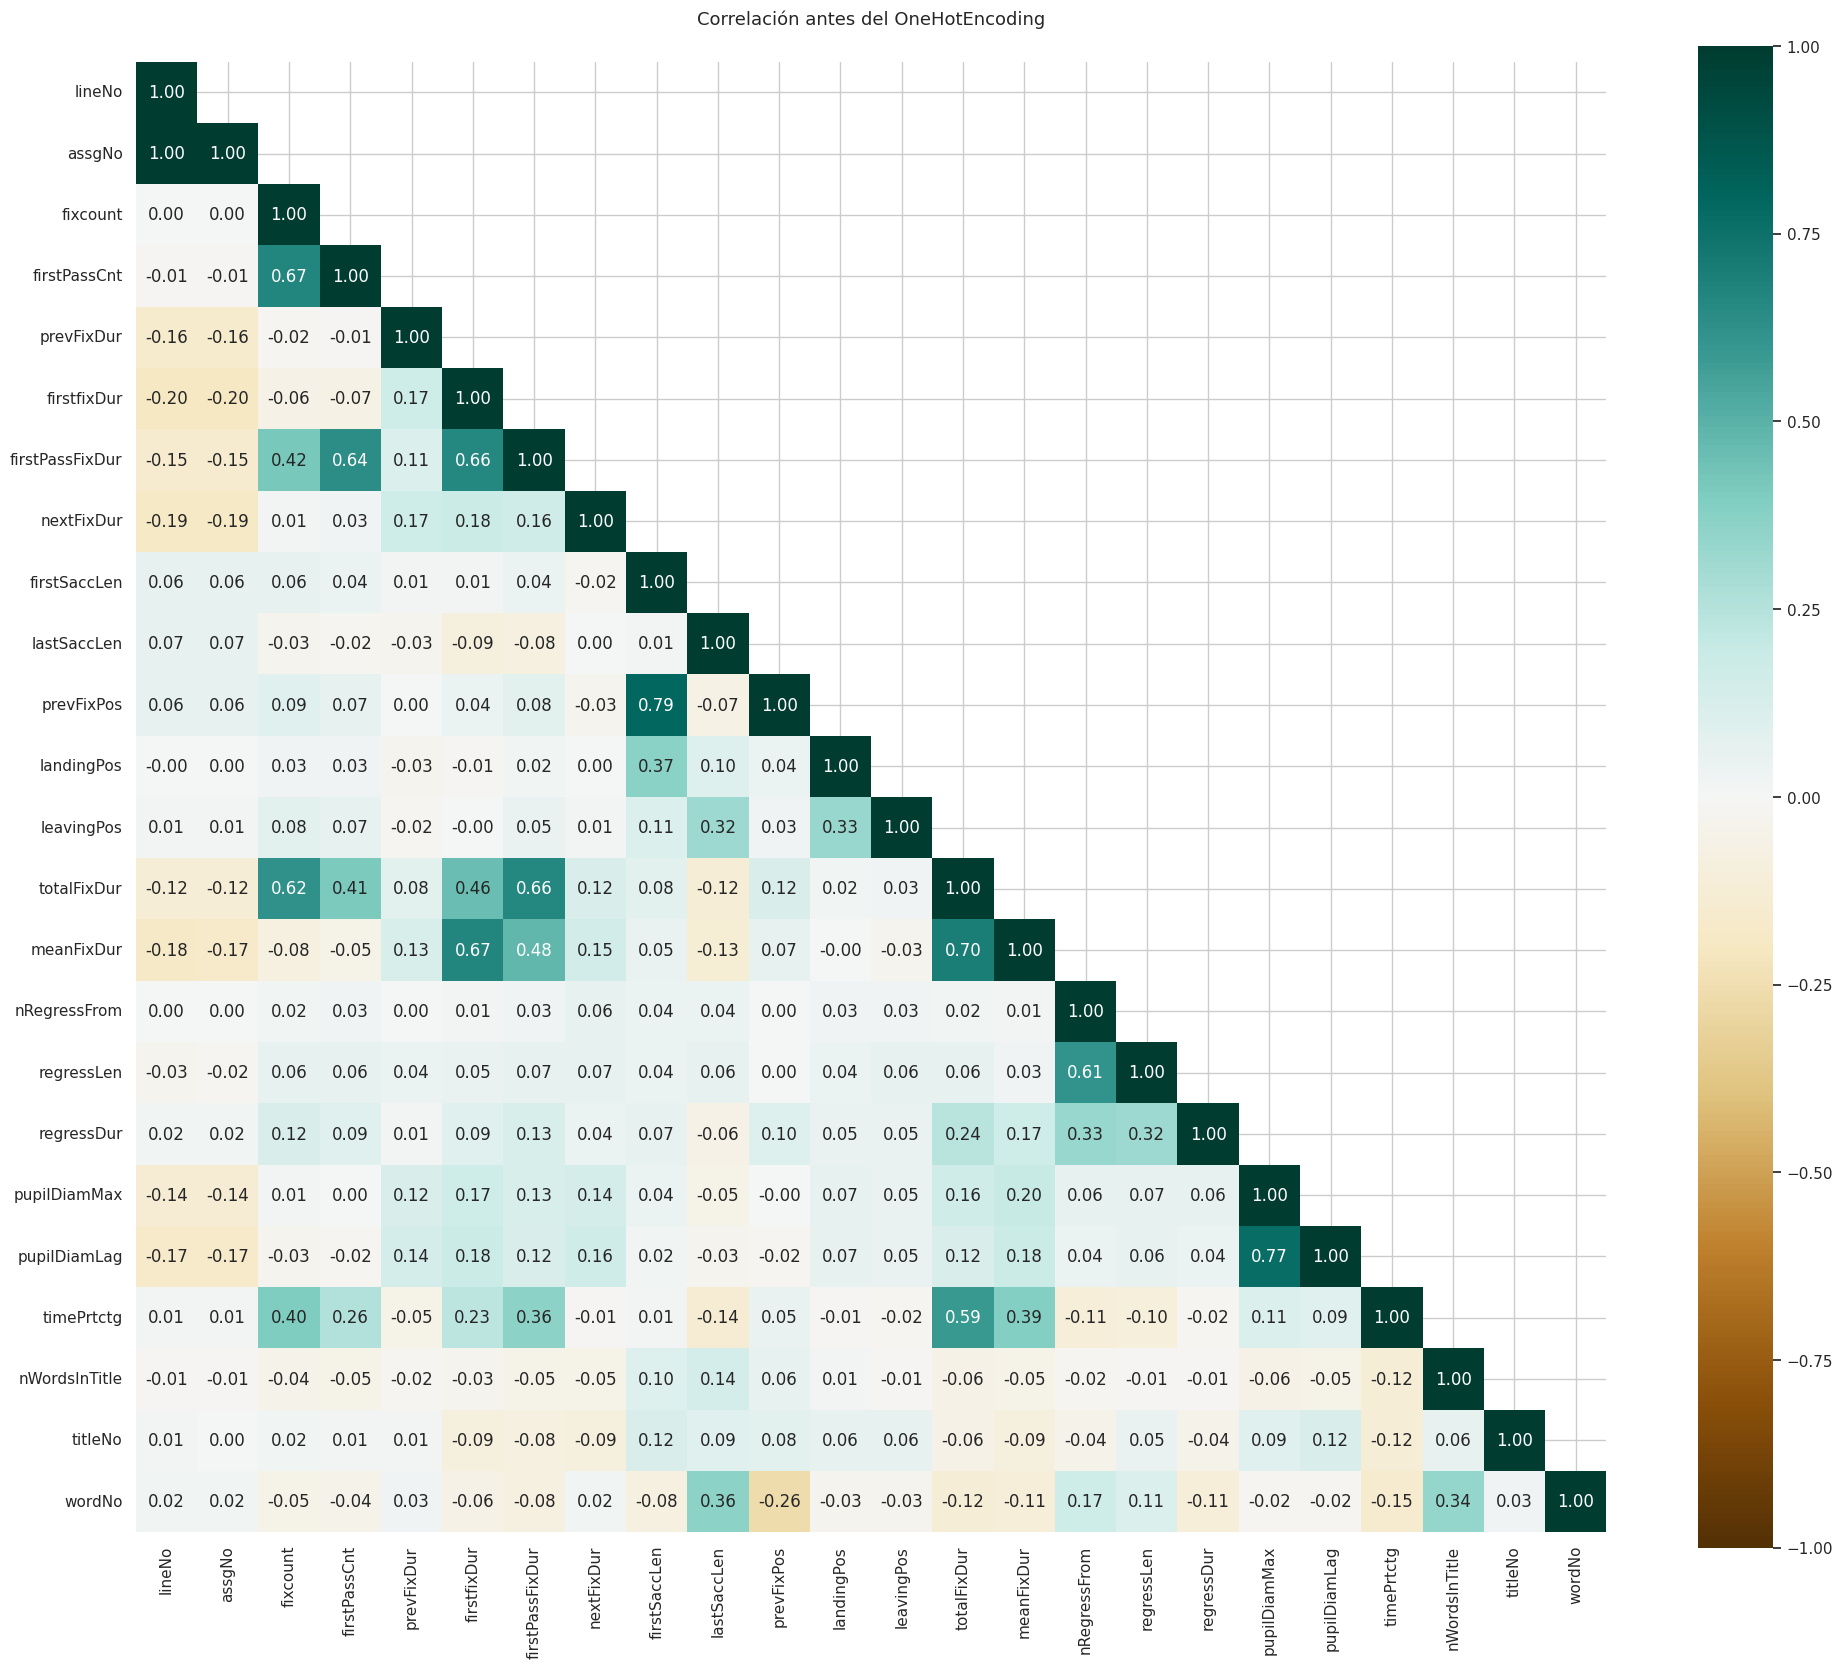

In [ ]:
corr_before = graficar_matriz_correlacion(X,
                                          metodo='pearson',
                                          titulo="Correlación antes del OneHotEncoding")

In [ ]:
def eliminar_columnas_no_utiles(df, columnas_a_eliminar):
    """
    Elimina columnas que no aportan al modelo, típicamente identificadores.

    Parámetros:
    df: DataFrame original
    columnas_a_eliminar: lista de nombres de columnas a remover

    Retorna:
    df limpio
    """
    return df.drop(columns=columnas_a_eliminar, errors="ignore")

In [ ]:
columnas_no_utiles = ["lineNo"]
X_limpio = eliminar_columnas_no_utiles(X, columnas_no_utiles)

##**4. DIVIDIR DATA EN TEST Y TRAIN**

In [ ]:
# Separar Train y Test (estratificado)

X_train, X_test, y_train, y_test = train_test_split(
    X_limpio, y, test_size=0.3, random_state=42, stratify=y
)

print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

Conjunto de entrenamiento: (7655, 26)
Conjunto de prueba: (3281, 26)


##**5. PREPROCESAMIENTO DE DATOS**

In [ ]:
num_cols_train, cat_cols_train, date_cols_train = detectar_tipos_columnas(X_limpio, target=None)

Columnas numéricas: ['assgNo', 'fixcount', 'firstPassCnt', 'prevFixDur', 'firstfixDur', 'firstPassFixDur', 'nextFixDur', 'firstSaccLen', 'lastSaccLen', 'prevFixPos', 'landingPos', 'leavingPos', 'totalFixDur', 'meanFixDur', 'nRegressFrom', 'regressLen', 'regressDur', 'pupilDiamMax', 'pupilDiamLag', 'timePrtctg', 'nWordsInTitle', 'titleNo', 'wordNo']
Columnas categóricas: ['P1stFixation', 'P2stFixation', 'nextWordRegress']
Columnas de fecha: []

Resumen → Numéricas: 23, Categóricas: 3, Fechas: 0


In [ ]:
# Preprocesador:
# - Numéricas -> StandardScaler
# - Categóricas -> OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_train),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols_train)
    ],
    remainder='drop'
)

In [ ]:
def compute_metrics_multiclass(model, X_train, y_train, X_test, y_test, show_roc=True):
    """
    Calcula métricas y gráficos para CLASIFICACIÓN MULTICLASE.
    - Usa predict_proba (preferido) o decision_function si no existe.
    - Devuelve dict con métricas (train/test) y AUC macro OvR (y OVO si aplica).
    - Genera matrices de confusión y, si show_roc=True y el modelo lo permite,
      una figura combinada: matrices (train/test) + curva ROC OvR (micro/macro + por clase),
      en formato compacto, adecuado para informes tipo IEEE.
    """

    # --- helper para obtener scores ---
    def get_scores(m, X):
        if hasattr(m, "predict_proba"):
            S = m.predict_proba(X)          # (n_samples, n_classes)
            return S, "proba"
        elif hasattr(m, "decision_function"):
            S = m.decision_function(X)      # (n_samples, n_classes) o 1D
            if S.ndim == 1:
                # si por alguna razón es 1D, lo convertimos a 2D artificial
                S = np.vstack([-S, S]).T
            return S, "score"
        else:
            return None, None

    # --- predicciones discretas ---
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # --- métricas principales ---
    metrics = {}

    metrics["train"] = {
        "Accuracy": accuracy_score(y_train, y_pred_train),
        "Precision_macro": precision_score(y_train, y_pred_train, average="macro", zero_division=0),
        "Recall_macro":    recall_score(y_train, y_pred_train, average="macro", zero_division=0),
        "F1_macro":        f1_score(y_train, y_pred_train, average="macro", zero_division=0),
        "Precision_weighted": precision_score(y_train, y_pred_train, average="weighted", zero_division=0),
        "Recall_weighted":    recall_score(y_train, y_pred_train, average="weighted", zero_division=0),
        "F1_weighted":        f1_score(y_train, y_pred_train, average="weighted", zero_division=0),
        "report": classification_report(y_train, y_pred_train, zero_division=0)
    }

    metrics["test"] = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision_macro": precision_score(y_test, y_pred_test, average="macro", zero_division=0),
        "Recall_macro":    recall_score(y_test, y_pred_test, average="macro", zero_division=0),
        "F1_macro":        f1_score(y_test, y_pred_test, average="macro", zero_division=0),
        "Precision_weighted": precision_score(y_test, y_pred_test, average="weighted", zero_division=0),
        "Recall_weighted":    recall_score(y_test, y_pred_test, average="weighted", zero_division=0),
        "F1_weighted":        f1_score(y_test, y_pred_test, average="weighted", zero_division=0),
        "report": classification_report(y_test, y_pred_test, zero_division=0)
    }

    # --- matrices de confusión ---
    classes = np.unique(np.concatenate([np.array(y_train), np.array(y_test)]))
    cm_tr = confusion_matrix(y_train, y_pred_train, labels=classes)
    cm_te = confusion_matrix(y_test,  y_pred_test,  labels=classes)

    # --- scores para ROC/AUC ---
    scores_tr, st_tr = get_scores(model, X_train)
    scores_te, st_te = get_scores(model, X_test)

    # Inicializamos AUC en None por si no se puede calcular
    metrics["test"]["ROC_AUC_macro_OvR"] = None
    metrics["test"]["ROC_AUC_macro_OVO"] = None

    # Si el modelo da scores/probas, calculamos AUC y dibujamos ROC
    if scores_te is not None:
        # Binarizar y
        lb = LabelBinarizer()
        lb.fit(classes)
        y_test_bin  = lb.transform(y_test)
        y_train_bin = lb.transform(y_train)

        # AUC macro OvR y OVO (si aplica)
        try:
            auc_macro_ovr = roc_auc_score(y_test, scores_te, multi_class="ovr", average="macro")
        except Exception:
            auc_macro_ovr = None
        try:
            auc_macro_ovo = roc_auc_score(y_test, scores_te, multi_class="ovo", average="macro")
        except Exception:
            auc_macro_ovo = None

        metrics["test"]["ROC_AUC_macro_OvR"] = (None if auc_macro_ovr is None else float(auc_macro_ovr))
        metrics["test"]["ROC_AUC_macro_OVO"] = (None if auc_macro_ovo is None else float(auc_macro_ovo))

        # Solo graficamos ROC si show_roc=True
        if show_roc:
            # --- Curvas ROC OvR por clase ---
            fpr = {}; tpr = {}; roc_auc_cls = {}
            for i, cls in enumerate(classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], scores_te[:, i])
                roc_auc_cls[i] = auc(fpr[i], tpr[i])

            # micro-average
            fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), scores_te.ravel())
            roc_auc_cls["micro"] = auc(fpr["micro"], tpr["micro"])

            # macro-average
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(len(classes)):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            mean_tpr /= len(classes)
            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr
            roc_auc_cls["macro"] = auc(fpr["macro"], tpr["macro"])

            # --- FIGURA COMBINADA: CM train, CM test, ROC ---
            fig = plt.figure(figsize=(8, 3))  # compacto, buen tamaño para IEEE
            gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.3])

            # Matriz Train
            ax1 = fig.add_subplot(gs[0, 0])
            sns.heatmap(cm_tr, annot=True, fmt="d", cmap="Reds", ax=ax1, cbar=False)
            ax1.set_title("Train", fontsize=8)
            ax1.set_xlabel("Predicted", fontsize=7)
            ax1.set_ylabel("Actual", fontsize=7)
            ax1.set_xticklabels(classes, fontsize=6)
            ax1.set_yticklabels(classes, fontsize=6)

            # Matriz Test
            ax2 = fig.add_subplot(gs[0, 1])
            sns.heatmap(cm_te, annot=True, fmt="d", cmap="Blues", ax=ax2, cbar=False)
            ax2.set_title("Test", fontsize=8)
            ax2.set_xlabel("Predicted", fontsize=7)
            ax2.set_ylabel("Actual", fontsize=7)
            ax2.set_xticklabels(classes, fontsize=6)
            ax2.set_yticklabels(classes, fontsize=6)

            # Curva ROC
            ax3 = fig.add_subplot(gs[0, 2])
            ax3.plot(
                fpr["micro"], tpr["micro"],
                label=f"micro AUC={roc_auc_cls['micro']:.2f}", lw=1
            )
            ax3.plot(
                fpr["macro"], tpr["macro"],
                label=f"macro AUC={roc_auc_cls['macro']:.2f}", lw=1
            )
            for i, cls in enumerate(classes):
                ax3.plot(
                    fpr[i], tpr[i], lw=0.8,
                    label=f"{cls} AUC={roc_auc_cls[i]:.2f}"
                )

            ax3.plot([0, 1], [0, 1], "k--", lw=0.7)
            ax3.set_xlabel("FPR", fontsize=7)
            ax3.set_ylabel("TPR", fontsize=7)
            ax3.set_title("ROC OvR", fontsize=8)
            ax3.legend(fontsize=6, loc="lower right")
            ax3.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

    else:
        # Si el modelo no tiene scores/proba, al menos dibujamos las matrices en pequeño
        fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))
        sns.heatmap(cm_tr, annot=True, fmt="d", cmap="Reds", ax=axes[0], cbar=False)
        axes[0].set_title("Train", fontsize=8)
        axes[0].set_xlabel("Predicted", fontsize=7)
        axes[0].set_ylabel("Actual", fontsize=7)
        axes[0].tick_params(labelsize=6)

        sns.heatmap(cm_te, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
        axes[1].set_title("Test", fontsize=8)
        axes[1].set_xlabel("Predicted", fontsize=7)
        axes[1].set_ylabel("Actual", fontsize=7)
        axes[1].tick_params(labelsize=6)

        plt.tight_layout()
        plt.show()

    # --- imprimir resumen breve ---
    print(f"\n{model.__class__.__name__} (multiclase)")
    print("🟠 Train:")
    for k, v in metrics["train"].items():
        if k != "report":
            print(f" {k}: {v:.3f}" if isinstance(v, (int, float)) else f" {k}: {v}")

    print("\n🔵 Test:")
    for k, v in metrics["test"].items():
        if k != "report":
            if isinstance(v, (int, float)):
                print(f" {k}: {v:.3f}")
            else:
                print(f" {k}: {v}")

    return metrics

In [ ]:
def guardar_resultados_modelo(
    nombre_modelo: str,
    resultados_dict: dict,
    pipeline_o_grid: object,
    X_test,
    y_test
) -> dict:
    """
    Calcula métricas clave, extrae hiperparámetros y los guarda
    en un diccionario de resultados.
    """

    # 1. Obtener el mejor estimador (si es GridSearchCV) o el pipeline (si es Pipeline)
    if hasattr(pipeline_o_grid, 'best_estimator_'):
        # GridSearchCV / RandomizedSearchCV
        modelo_final = pipeline_o_grid.best_estimator_
        hiperparametros_optimos = pipeline_o_grid.best_params_
    else:
        # Pipeline "normal"
        modelo_final = pipeline_o_grid
        hiperparametros_optimos = modelo_final.named_steps['model'].get_params()

    # 2. Generar predicciones en el conjunto de prueba
    y_pred = pipeline_o_grid.predict(X_test)

    # 2.1 Asegurar que y_test funcione tanto si es Series como array
    try:
        n_clases = len(y_test.unique())
    except AttributeError:
        n_clases = len(np.unique(y_test))

    average_type = 'weighted' if n_clases > 2 else 'binary'

    # 3. Calcular Métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average=average_type)
    precision = precision_score(y_test, y_pred, average=average_type, zero_division=0)
    recall = recall_score(y_test, y_pred, average=average_type, zero_division=0)

    # 4. Guardar resultados
    resultados_dict[nombre_modelo] = {
        'Accuracy': accuracy,
        'F1_Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Hiperparametros': hiperparametros_optimos
    }

    print(f" Resultados de '{nombre_modelo}' guardados.")
    return resultados_dict

In [ ]:
resultados_compilados = {}

##**6. DEFINICIÓN Y ENTRENAMIENTO DEL MODELO**

##*6.1 MODELO PARAMÉTRICO*

**Logistic Regression (Regresión Logística Multiclase)**

In [ ]:
# Definir el modelo
model_LogisticRegression = LogisticRegression(
    solver='liblinear',    #'lbfgs'
    random_state = 0,
    multi_class='ovr', # o 'multinomial'
    max_iter=1000,
    class_weight='balanced'
)

pipeline_lr = Pipeline(steps=[
    ('pre', preprocessor), # Preprocesamiento
    ('model', model_LogisticRegression) # Modelo LR
])

# Entrenar pipeline
pipeline_lr.fit(X_train, y_train)

# ... se almacenan las métricas ...
resultados_compilados = guardar_resultados_modelo(
    nombre_modelo='Regresion_Logistica_Multiclase',
    resultados_dict=resultados_compilados,
    pipeline_o_grid=pipeline_lr,
    X_test=X_test,
    y_test=y_test
)

# Se evalua con test
y_pred_test = pipeline_lr.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


 Resultados de 'Regresion_Logistica_Multiclase' guardados.


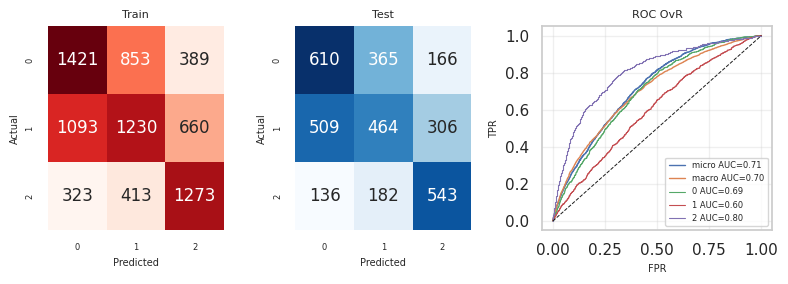


Pipeline (multiclase)
🟠 Train:
 Accuracy: 0.513
 Precision_macro: 0.514
 Recall_macro: 0.527
 F1_macro: 0.518
 Precision_weighted: 0.510
 Recall_weighted: 0.513
 F1_weighted: 0.509

🔵 Test:
 Accuracy: 0.493
 Precision_macro: 0.493
 Recall_macro: 0.509
 F1_macro: 0.498
 Precision_weighted: 0.488
 Recall_weighted: 0.493
 F1_weighted: 0.487
 ROC_AUC_macro_OvR: 0.698
 ROC_AUC_macro_OVO: 0.710


{'train': {'Accuracy': 0.5126061397779229,
  'Precision_macro': 0.5139679849597828,
  'Recall_macro': 0.5265312890938726,
  'F1_macro': 0.5178564376679077,
  'Precision_weighted': 0.5101551038403358,
  'Recall_weighted': 0.5126061397779229,
  'F1_weighted': 0.5089972259362286,
  'report': '              precision    recall  f1-score   support\n\n           0       0.50      0.53      0.52      2663\n           1       0.49      0.41      0.45      2983\n           2       0.55      0.63      0.59      2009\n\n    accuracy                           0.51      7655\n   macro avg       0.51      0.53      0.52      7655\nweighted avg       0.51      0.51      0.51      7655\n'},
 'test': {'Accuracy': 0.4928375495275831,
  'Precision_macro': 0.49332755982868925,
  'Recall_macro': 0.5093547336446682,
  'F1_macro': 0.4977711342060471,
  'Precision_weighted': 0.48832747498263573,
  'Recall_weighted': 0.4928375495275831,
  'F1_weighted': 0.4869564718845768,
  'report': '              precision 

In [ ]:
# Evaluar
metrics_lr = compute_metrics_multiclass(
    model=pipeline_lr,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    show_roc=True
)

# Mostrar las métricas
metrics_lr

In [ ]:
# Definir el modelo
model_lda = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")

pipeline_lda = Pipeline(steps=[
    ('pre', preprocessor), # Preprocesamiento
    ('model', model_lda) # Modelo LR
])

# Entrenar pipeline
pipeline_lda.fit(X_train, y_train)

# ... se almacenan las métricas ...
resultados_compilados = guardar_resultados_modelo(
    nombre_modelo='Regresion_Logistica_Multiclase_LDA',
    resultados_dict=resultados_compilados,
    pipeline_o_grid=pipeline_lda,
    X_test=X_test,
    y_test=y_test
)

# Se evalua con test
y_pred_test = pipeline_lda.predict(X_test)


 Resultados de 'Regresion_Logistica_Multiclase_LDA' guardados.


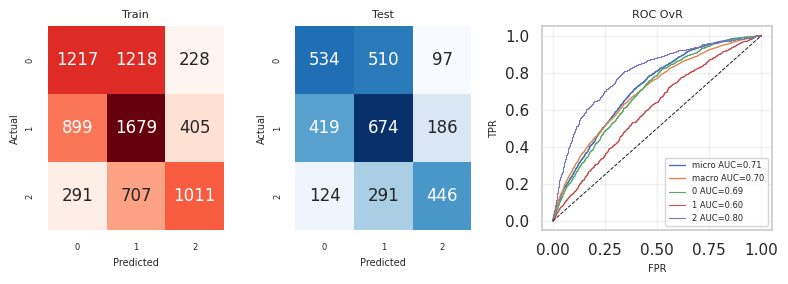


Pipeline (multiclase)
🟠 Train:
 Accuracy: 0.510
 Precision_macro: 0.529
 Recall_macro: 0.508
 F1_macro: 0.514
 Precision_weighted: 0.519
 Recall_weighted: 0.510
 F1_weighted: 0.511

🔵 Test:
 Accuracy: 0.504
 Precision_macro: 0.522
 Recall_macro: 0.504
 F1_macro: 0.511
 Precision_weighted: 0.511
 Recall_weighted: 0.504
 F1_weighted: 0.505
 ROC_AUC_macro_OvR: 0.696
 ROC_AUC_macro_OVO: 0.707


{'train': {'Accuracy': 0.5103853690398432,
  'Precision_macro': 0.5288144664246929,
  'Recall_macro': 0.507698335071098,
  'F1_macro': 0.5144628555860585,
  'Precision_weighted': 0.5188231799101063,
  'Recall_weighted': 0.5103853690398432,
  'F1_weighted': 0.5109309798099992,
  'report': '              precision    recall  f1-score   support\n\n           0       0.51      0.46      0.48      2663\n           1       0.47      0.56      0.51      2983\n           2       0.61      0.50      0.55      2009\n\n    accuracy                           0.51      7655\n   macro avg       0.53      0.51      0.51      7655\nweighted avg       0.52      0.51      0.51      7655\n'},
 'test': {'Accuracy': 0.5041145992075586,
  'Precision_macro': 0.521522620576408,
  'Recall_macro': 0.5043290128544312,
  'F1_macro': 0.5106636765319227,
  'Precision_weighted': 0.5111026389140608,
  'Recall_weighted': 0.5041145992075586,
  'F1_weighted': 0.505476027040868,
  'report': '              precision    re

In [ ]:
# Evaluar
metrics_lda = compute_metrics_multiclass(
    model=pipeline_lda,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    show_roc=True
)

# Mostrar las métricas
metrics_lda

In [ ]:
# Definir el modelo
model_qda = QuadraticDiscriminantAnalysis()

pipeline_qda = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', model_qda)
])

# Entrenar pipeline
pipeline_qda.fit(X_train, y_train)

# ... se almacenan las métricas ...
resultados_compilados = guardar_resultados_modelo(
    nombre_modelo='Regresion_Logistica_Multiclase_QDA',
    resultados_dict=resultados_compilados,
    pipeline_o_grid=pipeline_qda,
    X_test=X_test,
    y_test=y_test
)

# Se evalua con test
y_pred_test = pipeline_qda.predict(X_test)


 Resultados de 'Regresion_Logistica_Multiclase_QDA' guardados.


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


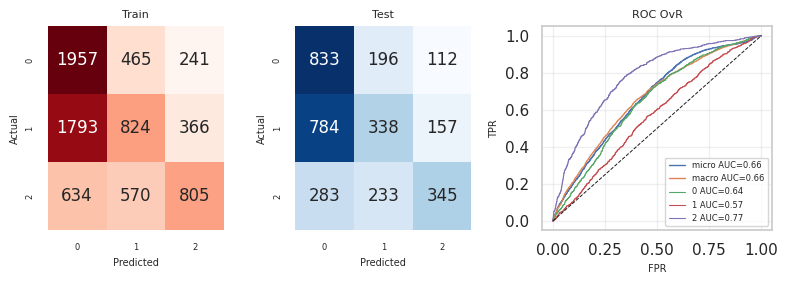


Pipeline (multiclase)
🟠 Train:
 Accuracy: 0.468
 Precision_macro: 0.487
 Recall_macro: 0.471
 F1_macro: 0.455
 Precision_weighted: 0.478
 Recall_weighted: 0.468
 F1_weighted: 0.449

🔵 Test:
 Accuracy: 0.462
 Precision_macro: 0.480
 Recall_macro: 0.465
 F1_macro: 0.449
 Precision_weighted: 0.472
 Recall_weighted: 0.462
 F1_weighted: 0.442
 ROC_AUC_macro_OvR: 0.661
 ROC_AUC_macro_OVO: 0.667


{'train': {'Accuracy': 0.46845199216198563,
  'Precision_macro': 0.486586119494242,
  'Recall_macro': 0.470604770952096,
  'F1_macro': 0.455463833758714,
  'Precision_weighted': 0.477638419301574,
  'Recall_weighted': 0.46845199216198563,
  'F1_weighted': 0.449356896565462,
  'report': '              precision    recall  f1-score   support\n\n           0       0.45      0.73      0.56      2663\n           1       0.44      0.28      0.34      2983\n           2       0.57      0.40      0.47      2009\n\n    accuracy                           0.47      7655\n   macro avg       0.49      0.47      0.46      7655\nweighted avg       0.48      0.47      0.45      7655\n'},
 'test': {'Accuracy': 0.46205425175251447,
  'Precision_macro': 0.4803294231825354,
  'Recall_macro': 0.4650090579766158,
  'F1_macro': 0.4486811651462283,
  'Precision_weighted': 0.4717013668539589,
  'Recall_weighted': 0.46205425175251447,
  'F1_weighted': 0.44207494220236826,
  'report': '              precision   

In [ ]:
# Evaluar
metrics_qda = compute_metrics_multiclass(
    model=pipeline_qda,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    show_roc=True
)

# Mostrar las métricas
metrics_qda

##*6.2 MODELO NO PARAMÉTRICO*

**K-Nearest Neighbors (KNN)**

In [ ]:
# Definir el modelo
model_knn = KNeighborsClassifier(
    n_neighbors=3,      # número de vecinos
    weights='distance',  # todos los vecinos tienen el mismo peso
    metric='manhattan', # distancia euclidiana
    p=1
)

pipeline_knn = Pipeline(steps=[
    ('pre', preprocessor), # Preprocesamiento
    ('model', model_knn) # Modelo KNN
])

# Entrenar pipeline
pipeline_knn.fit(X_train, y_train)

# ... se almacenan las métricas ...
resultados_compilados = guardar_resultados_modelo(
    nombre_modelo='K-Nearest_Neighbors',
    resultados_dict=resultados_compilados,
    pipeline_o_grid=pipeline_knn,
    X_test=X_test,
    y_test=y_test
)

# Se evalua con test
y_pred_test = pipeline_knn.predict(X_test)


 Resultados de 'K-Nearest_Neighbors' guardados.


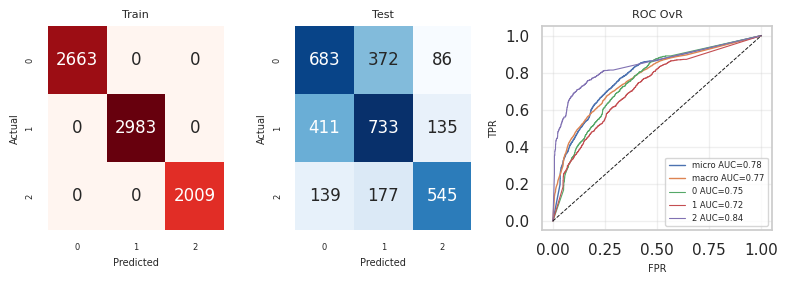


Pipeline (multiclase)
🟠 Train:
 Accuracy: 1.000
 Precision_macro: 1.000
 Recall_macro: 1.000
 F1_macro: 1.000
 Precision_weighted: 1.000
 Recall_weighted: 1.000
 F1_weighted: 1.000

🔵 Test:
 Accuracy: 0.598
 Precision_macro: 0.612
 Recall_macro: 0.602
 F1_macro: 0.606
 Precision_weighted: 0.602
 Recall_weighted: 0.598
 F1_weighted: 0.599
 ROC_AUC_macro_OvR: 0.771
 ROC_AUC_macro_OVO: 0.777


{'train': {'Accuracy': 1.0,
  'Precision_macro': 1.0,
  'Recall_macro': 1.0,
  'F1_macro': 1.0,
  'Precision_weighted': 1.0,
  'Recall_weighted': 1.0,
  'F1_weighted': 1.0,
  'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      2663\n           1       1.00      1.00      1.00      2983\n           2       1.00      1.00      1.00      2009\n\n    accuracy                           1.00      7655\n   macro avg       1.00      1.00      1.00      7655\nweighted avg       1.00      1.00      1.00      7655\n'},
 'test': {'Accuracy': 0.5976836330387078,
  'Precision_macro': 0.6123948722356323,
  'Recall_macro': 0.6015622033549729,
  'F1_macro': 0.6059258318190442,
  'Precision_weighted': 0.6022292635205264,
  'Recall_weighted': 0.5976836330387078,
  'F1_weighted': 0.5990537384177931,
  'report': '              precision    recall  f1-score   support\n\n           0       0.55      0.60      0.58      1141\n           1       

In [ ]:
# Evaluar
metrics_knn = compute_metrics_multiclass(
    model=pipeline_knn,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    show_roc=True
)

# Mostrar las métricas
metrics_knn

##*6.3 MODELO BASADO EN ENSAMBLE DE ÁRBOLES DE DECISIÓN*

**Random Forest (Bosque Aleatorio)**

In [ ]:
# Definir el modelo
model_RandomForestClassifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

pipeline_rfc = Pipeline(steps=[
    ('pre', preprocessor), # Preprocesamiento
    ('model', model_RandomForestClassifier) # Modelo KNN
])

# Entrenar pipeline
pipeline_rfc.fit(X_train, y_train)

# ... se almacenan las métricas ...
resultados_compilados = guardar_resultados_modelo(
    nombre_modelo='Random_Forest_Classifier',
    resultados_dict=resultados_compilados,
    pipeline_o_grid=pipeline_rfc,
    X_test=X_test,
    y_test=y_test
)

# Se evalua con test
y_pred_test = pipeline_rfc.predict(X_test)



 Resultados de 'Random_Forest_Classifier' guardados.


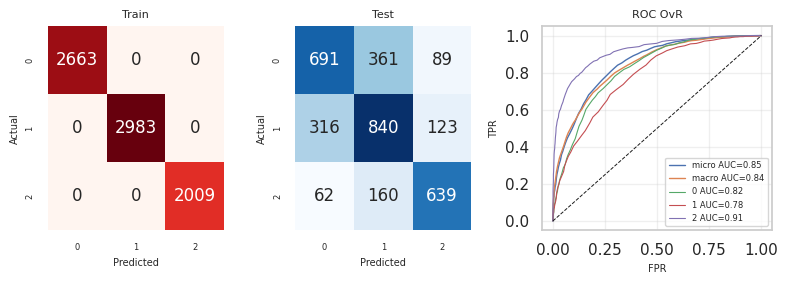


Pipeline (multiclase)
🟠 Train:
 Accuracy: 1.000
 Precision_macro: 1.000
 Recall_macro: 1.000
 F1_macro: 1.000
 Precision_weighted: 1.000
 Recall_weighted: 1.000
 F1_weighted: 1.000

🔵 Test:
 Accuracy: 0.661
 Precision_macro: 0.671
 Recall_macro: 0.668
 F1_macro: 0.669
 Precision_weighted: 0.662
 Recall_weighted: 0.661
 F1_weighted: 0.661
 ROC_AUC_macro_OvR: 0.837
 ROC_AUC_macro_OVO: 0.847


{'train': {'Accuracy': 1.0,
  'Precision_macro': 1.0,
  'Recall_macro': 1.0,
  'F1_macro': 1.0,
  'Precision_weighted': 1.0,
  'Recall_weighted': 1.0,
  'F1_weighted': 1.0,
  'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      2663\n           1       1.00      1.00      1.00      2983\n           2       1.00      1.00      1.00      2009\n\n    accuracy                           1.00      7655\n   macro avg       1.00      1.00      1.00      7655\nweighted avg       1.00      1.00      1.00      7655\n'},
 'test': {'Accuracy': 0.6613837244742456,
  'Precision_macro': 0.6714910198791023,
  'Recall_macro': 0.6681774965753652,
  'F1_macro': 0.6693994433274257,
  'Precision_weighted': 0.6624320815894642,
  'Recall_weighted': 0.6613837244742456,
  'F1_weighted': 0.6614305957754267,
  'report': '              precision    recall  f1-score   support\n\n           0       0.65      0.61      0.63      1141\n           1       

In [ ]:
# Evaluar
metrics_rfc = compute_metrics_multiclass(
    model=pipeline_rfc,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    show_roc=True
)

# Mostrar las métricas
metrics_rfc

##*6.4 MODELO DE RED NEURONAL ARTIFICIAL*

**Multilayer Perceptron / MLP (Perceptrón Multicapa)**

In [ ]:
# Definir el modelo
model_MLPClassifier = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    batch_size=64,
    max_iter=1000,
    early_stopping=False,
    random_state=42
)

pipeline_MLPC = Pipeline(steps=[
    ('pre', preprocessor), # Preprocesamiento
    ('model', model_MLPClassifier) # Modelo
])

# Entrenar pipeline
pipeline_MLPC.fit(X_train, y_train)

# ... se almacenan las métricas ...
resultados_compilados = guardar_resultados_modelo(
    nombre_modelo='MLPClassifier',
    resultados_dict=resultados_compilados,
    pipeline_o_grid=pipeline_MLPC,
    X_test=X_test,
    y_test=y_test
)

# Se evalua con test
y_pred_test = pipeline_MLPC.predict(X_test)


 Resultados de 'MLPClassifier' guardados.


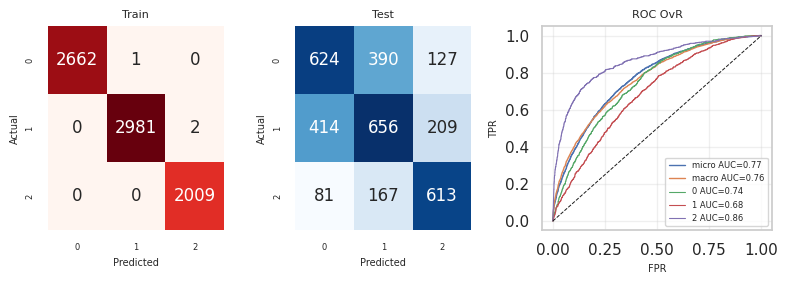


Pipeline (multiclase)
🟠 Train:
 Accuracy: 1.000
 Precision_macro: 1.000
 Recall_macro: 1.000
 F1_macro: 1.000
 Precision_weighted: 1.000
 Recall_weighted: 1.000
 F1_weighted: 1.000

🔵 Test:
 Accuracy: 0.577
 Precision_macro: 0.581
 Recall_macro: 0.591
 F1_macro: 0.585
 Precision_weighted: 0.574
 Recall_weighted: 0.577
 F1_weighted: 0.575
 ROC_AUC_macro_OvR: 0.760
 ROC_AUC_macro_OVO: 0.770


{'train': {'Accuracy': 0.9996080992815154,
  'Precision_macro': 0.9995567081698989,
  'Recall_macro': 0.9996513392303958,
  'F1_macro': 0.9996039201181911,
  'Precision_weighted': 0.9996083153121833,
  'Recall_weighted': 0.9996080992815154,
  'F1_weighted': 0.9996081191572611,
  'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      2663\n           1       1.00      1.00      1.00      2983\n           2       1.00      1.00      1.00      2009\n\n    accuracy                           1.00      7655\n   macro avg       1.00      1.00      1.00      7655\nweighted avg       1.00      1.00      1.00      7655\n'},
 'test': {'Accuracy': 0.5769582444376714,
  'Precision_macro': 0.5814639209767646,
  'Recall_macro': 0.5905840772389191,
  'F1_macro': 0.585348402294242,
  'Precision_weighted': 0.5742512728534694,
  'Recall_weighted': 0.5769582444376714,
  'F1_weighted': 0.5750213404924676,
  'report': '              precision    

In [ ]:
# Evaluar
metrics_MLPC = compute_metrics_multiclass(
    model=pipeline_MLPC,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    show_roc=True
)

# Mostrar las métricas
metrics_MLPC

##*6.5 MODELO DE MÁQUINA DE VECTORES DE SOPORTE*

 **Support Vector Machine / SVM (Máquina de Vectores de Soporte)**

In [ ]:
model_SVC = SVC(
    kernel='rbf',
    C=5,                    # más penalización a errores → modelo más complejo
    gamma='scale',          # buen valor por defecto con datos escalados
    class_weight='balanced',# compensa desbalanceo de clases
    probability=True,
    random_state=42
)

pipeline_SVC = Pipeline(steps=[
    ('pre', preprocessor), # Preprocesamiento
    ('model', model_SVC) # Modelo
])

# Entrenar pipeline
pipeline_SVC.fit(X_train, y_train)

# ... se almacenan las métricas ...
resultados_compilados = guardar_resultados_modelo(
    nombre_modelo='SVC',
    resultados_dict=resultados_compilados,
    pipeline_o_grid=pipeline_SVC,
    X_test=X_test,
    y_test=y_test
)

# Se evalua con test
y_pred_test = pipeline_SVC.predict(X_test)

 Resultados de 'SVC' guardados.


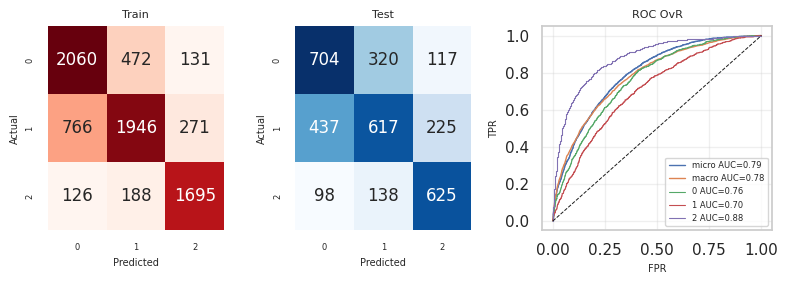


Pipeline (multiclase)
🟠 Train:
 Accuracy: 0.745
 Precision_macro: 0.751
 Recall_macro: 0.757
 F1_macro: 0.752
 Precision_weighted: 0.746
 Recall_weighted: 0.745
 F1_weighted: 0.743

🔵 Test:
 Accuracy: 0.593
 Precision_macro: 0.596
 Recall_macro: 0.608
 F1_macro: 0.600
 Precision_weighted: 0.591
 Recall_weighted: 0.593
 F1_weighted: 0.590
 ROC_AUC_macro_OvR: 0.781
 ROC_AUC_macro_OVO: 0.792


{'train': {'Accuracy': 0.7447419986936643,
  'Precision_macro': 0.7509559475044837,
  'Recall_macro': 0.7565434591897123,
  'F1_macro': 0.7519125982456876,
  'Precision_weighted': 0.7458806936600761,
  'Recall_weighted': 0.7447419986936643,
  'F1_weighted': 0.7432934425361504,
  'report': '              precision    recall  f1-score   support\n\n           0       0.70      0.77      0.73      2663\n           1       0.75      0.65      0.70      2983\n           2       0.81      0.84      0.83      2009\n\n    accuracy                           0.74      7655\n   macro avg       0.75      0.76      0.75      7655\nweighted avg       0.75      0.74      0.74      7655\n'},
 'test': {'Accuracy': 0.5931118561414203,
  'Precision_macro': 0.5961608339708507,
  'Recall_macro': 0.6084369589230686,
  'F1_macro': 0.5998727273779211,
  'Precision_weighted': 0.5909454548869194,
  'Recall_weighted': 0.5931118561414203,
  'F1_weighted': 0.5895275248301746,
  'report': '              precision   

In [ ]:
# Evaluar
metrics_SVC = compute_metrics_multiclass(
    model=pipeline_SVC,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    show_roc=True
)

# Mostrar las métricas
metrics_SVC

##**7. MÉTODO DE VALIDACIÓN**

In [ ]:
# Convertir a DataFrame de Pandas
df_resultados_final = pd.DataFrame.from_dict(
    resultados_compilados,
    orient='index'
)

# Mostrar la tabla final
print("\n---- Tabla de Comparación Final ----")
print(df_resultados_final)

#df_resultados_final.loc["Regresion_Logistica_Multiclase", "Hiperparametros"]


---- Tabla de Comparación Final ----
                                    Accuracy  F1_Score  Precision    Recall  \
Regresion_Logistica_Multiclase      0.492838  0.486956   0.488327  0.492838   
Regresion_Logistica_Multiclase_LDA  0.504115  0.505476   0.511103  0.504115   
Regresion_Logistica_Multiclase_QDA  0.462054  0.442075   0.471701  0.462054   
K-Nearest_Neighbors                 0.597684  0.599054   0.602229  0.597684   
Random_Forest_Classifier            0.661384  0.661431   0.662432  0.661384   
MLPClassifier                       0.576958  0.575021   0.574251  0.576958   
SVC                                 0.593112  0.589528   0.590945  0.593112   

                                                                      Hiperparametros  
Regresion_Logistica_Multiclase      {'C': 1.0, 'class_weight': 'balanced', 'dual':...  
Regresion_Logistica_Multiclase_LDA  {'covariance_estimator': None, 'n_components':...  
Regresion_Logistica_Multiclase_QDA  {'priors': None, 'reg_param':

In [ ]:
def obtener_top2(df_resultados_final, ordenar_por="F1_Score"):
    """
    Devuelve:
      - df_top2: DataFrame con los dos mejores modelos según la métrica dada.
      - top2_nombres: lista con los nombres de los dos mejores modelos.

    Parámetros
    ----------
    df_resultados_final : pd.DataFrame
        Tabla final generada desde resultados_compilados.

    ordenar_por : str
        Métrica por la cual se ordenará (ej: 'Accuracy', 'F1_Score').

    Returns
    -------
    df_top2 : pd.DataFrame
        DataFrame con los dos mejores modelos.
    top2_nombres : list
        Lista con los nombres de los dos mejores modelos.
    """

    # Validar métrica
    if ordenar_por not in df_resultados_final.columns:
        raise ValueError(f"La métrica '{ordenar_por}' no existe en el DataFrame.")

    # Ordenar por la métrica seleccionada (descendente: el mejor arriba)
    df_ordenado = df_resultados_final.sort_values(by=ordenar_por, ascending=False)

    # Tomar los dos mejores
    df_top2 = df_ordenado.head(2).copy()

    # Nombres del top 2 (índice del DataFrame)
    top2_nombres = df_top2.index.tolist()

    return df_top2, top2_nombres

In [ ]:
df_top2, top2_nombres = obtener_top2(df_resultados_final, ordenar_por="F1_Score")

print(df_top2)
print("Modelos Top 2:", top2_nombres)

                          Accuracy  F1_Score  Precision    Recall  \
Random_Forest_Classifier  0.661384  0.661431   0.662432  0.661384   
K-Nearest_Neighbors       0.597684  0.599054   0.602229  0.597684   

                                                            Hiperparametros  
Random_Forest_Classifier  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  
K-Nearest_Neighbors       {'algorithm': 'auto', 'leaf_size': 30, 'metric...  
Modelos Top 2: ['Random_Forest_Classifier', 'K-Nearest_Neighbors']


In [ ]:
# Diccionario solo con hiperparámetros por modelo
hiperparametros_modelos = {
    nombre_modelo: info['Hiperparametros']
    for nombre_modelo, info in resultados_compilados.items()
}


from google.colab import drive
drive.mount('/content/drive')  # solo la primera vez en la sesión

ruta_salida = '/content/drive/MyDrive/hiperparametros_modelos.json'

with open(ruta_salida, 'w', encoding='utf-8') as f:
    json.dump(hiperparametros_modelos, f, indent=4, ensure_ascii=False)

print(f" JSON guardado en: {ruta_salida}")

print(json.dumps(hiperparametros_modelos, indent=4, ensure_ascii=False))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 JSON guardado en: /content/drive/MyDrive/hiperparametros_modelos.json
{
    "Regresion_Logistica_Multiclase": {
        "C": 1.0,
        "class_weight": "balanced",
        "dual": false,
        "fit_intercept": true,
        "intercept_scaling": 1,
        "l1_ratio": null,
        "max_iter": 1000,
        "multi_class": "ovr",
        "n_jobs": null,
        "penalty": "l2",
        "random_state": 0,
        "solver": "liblinear",
        "tol": 0.0001,
        "verbose": 0,
        "warm_start": false
    },
    "Regresion_Logistica_Multiclase_LDA": {
        "covariance_estimator": null,
        "n_components": null,
        "priors": null,
        "shrinkage": "auto",
        "solver": "lsqr",
        "store_covariance": false,
        "tol": 0.0001
    },
    "Regresion_Logistica_Multiclase_QDA": {
        "priors": null,
        "reg_param": 0.0,


##**8. REDUCCIÓN DE DIMENSIÓN**

**ANÁLISIS DE VARIABLES INDIVIDUALES**

In [ ]:
def analizar_discriminacion_por_variable_original(
    preprocessor,
    X_train,
    y_train,
    q_umbral=0.25,
    mostrar_resumen=True
) -> pd.DataFrame:
    """
    Analiza la capacidad discriminativa de CADA VARIABLE ORIGINAL,
    aunque el preprocesador (StandardScaler + OneHotEncoder) genere más columnas.

    - Usa el mismo preprocesador que en tus pipelines.
    - Agrupa las columnas one-hot de una misma variable categórica.
    - Devuelve un DataFrame con UNA fila por variable original.

    Parámetros
    ----------
    preprocessor : ColumnTransformer
        El mismo preprocesador que usas en tus pipelines ('pre').
    X_train : DataFrame
        Datos originales de entrenamiento (26 columnas, sin target).
    y_train : Serie/array
        Variable objetivo.
    q_umbral : float
        Cuantil para marcar variables "débiles".
    mostrar_resumen : bool
        Si True, imprime resumen por consola.

    Returns
    -------
    df_orig : DataFrame
        Índice: variable original (26 filas)
        Columnas: F_score_max, F_score_mean, MI_max, MI_mean, n_columnas_codificadas, candidata_eliminar
    """

    # 1) Clonar y ajustar preprocesador sobre X_train (NO tocamos pipelines entrenados)
    pre_clonado = clone(preprocessor)
    X_pre = pre_clonado.fit_transform(X_train, y_train)

    # 2) Obtener nombres de columnas transformadas
    try:
        feature_names = pre_clonado.get_feature_names_out()
    except Exception:
        # Nombres genéricos si falla (no debería en tu caso)
        feature_names = np.array([f"feat_{i}" for i in range(X_pre.shape[1])])

    X_pre_df = pd.DataFrame(X_pre, columns=feature_names)
    X_np = X_pre_df.values
    y_arr = np.asarray(y_train).ravel()

    # 3) Calcular F-score y Mutual Information a nivel de columna transformada
    f_vals, p_vals = f_classif(X_np, y_arr)
    mi_vals = mutual_info_classif(X_np, y_arr, random_state=42)

    df_trans = pd.DataFrame({
        "variable_trans": feature_names,
        "F_score": f_vals,
        "p_valor": p_vals,
        "Mutual_Info": mi_vals
    })

    # 4) Mapear cada columna transformada a la variable original
    #    Asumimos nombres tipo: 'num__var', 'cat__var_cat'
    original_vars = []
    for name in df_trans["variable_trans"]:
        if name.startswith("num__"):
            # num__var -> var
            orig = name.split("num__", 1)[1]
        elif name.startswith("cat__"):
            # cat__var_categoria -> var (antes del primer "_")
            rest = name.split("cat__", 1)[1]
            orig = rest.split("_", 1)[0]
        else:
            # Por si acaso, se deja tal cual
            orig = name
        original_vars.append(orig)

    df_trans["variable_original"] = original_vars

    # 5) Agrupar por variable original
    agg_dict = {
        "F_score": ["max", "mean"],
        "Mutual_Info": ["max", "mean"],
        "variable_trans": "count"
    }

    df_orig = df_trans.groupby("variable_original").agg(agg_dict)
    df_orig.columns = [
        "F_score_max", "F_score_mean",
        "MI_max", "MI_mean",
        "n_columnas_codificadas"
    ]

    # 6) Umbrales y candidatas a eliminar (usamos los máximos)
    f_umbral = df_orig["F_score_max"].quantile(q_umbral)
    mi_umbral = df_orig["MI_max"].quantile(q_umbral)

    df_orig["candidata_eliminar"] = (
        (df_orig["F_score_max"] <= f_umbral) &
        (df_orig["MI_max"] <= mi_umbral)
    )

    # Ordenar de más a menos discriminativa
    df_orig = df_orig.sort_values(by="MI_max", ascending=False)

    # 7) Resumen
    if mostrar_resumen:
        print("\n=== ANÁLISIS POR VARIABLE ORIGINAL (tras preprocesado) ===")
        print(f"Variables originales analizadas: {df_orig.shape[0]}")
        print(f"Umbral F_score_max (q={q_umbral}): {f_umbral:.4f}")
        print(f"Umbral MI_max (q={q_umbral}): {mi_umbral:.4f}")

        cand = df_orig[df_orig["candidata_eliminar"]]
        print(f"\nVARIABLES CANDIDATAS A ELIMINAR (n={cand.shape[0]}):")
        if cand.shape[0] > 0:
            print(cand[["F_score_max", "MI_max", "n_columnas_codificadas"]])
        else:
            print("Ninguna variable original marcada como candidata según los umbrales.")

    return df_orig

In [ ]:
df_vars = analizar_discriminacion_por_variable_original(
    preprocessor=preprocessor,
    X_train=X_train,
    y_train=y_train,
    q_umbral=0.25,
    mostrar_resumen=True
)


=== ANÁLISIS POR VARIABLE ORIGINAL (tras preprocesado) ===
Variables originales analizadas: 26
Umbral F_score_max (q=0.25): 6.4385
Umbral MI_max (q=0.25): 0.0042

VARIABLES CANDIDATAS A ELIMINAR (n=2):
                   F_score_max    MI_max  n_columnas_codificadas
variable_original                                               
nextFixDur            0.201882  0.002198                       1
landingPos            2.065258  0.001362                       1


In [ ]:
model_registry = {
    "Regresion_Logistica_Multiclase": model_LogisticRegression,
    "Regresion_Logistica_Multiclase_LDA": model_lda,
    "Regresion_Logistica_Multiclase_QDA": model_qda,
    "K-Nearest_Neighbors": model_knn,
    "Random_Forest_Classifier": model_RandomForestClassifier,
    "MLPClassifier": model_MLPClassifier,
    "SVC": model_SVC
}


**PCA**

In [ ]:
def graficar_varianza_pca(
    preprocessor,
    X_train,
    porcentaje=0.90,
    fig_size=(8,5),
    mostrar_info=True
):
    """
    Preprocesa X_train, calcula PCA, grafica varianza acumulada y
    devuelve:
        k            → número óptimo de componentes
        X_train_pre  → datos preprocesados
        pca_full     → PCA ajustado
    """

    # 1. Preprocesar X_train (sin alterar el pipeline original)
    pre_clonado = clone(preprocessor)
    X_train_pre = pre_clonado.fit_transform(X_train)

    # 2. Ajustar PCA completo
    pca_full = PCA().fit(X_train_pre)

    var_exp = pca_full.explained_variance_ratio_
    var_acum = np.cumsum(var_exp)

    # 3. Encontrar número mínimo de componentes para el porcentaje deseado
    k = int(np.argmax(var_acum >= porcentaje) + 1)

    if mostrar_info:
        print(f"Porcentaje deseado: {porcentaje*100:.1f}%")
        print(f"Componentes necesarias: {k} de {X_train_pre.shape[1]} totales")

    # 4. Gráfico
    plt.figure(figsize=fig_size)
    plt.plot(var_acum, marker='o', label='Varianza acumulada')

    # Línea horizontal en el porcentaje
    plt.axhline(y=porcentaje, color='red', linestyle='--',
                label=f'{porcentaje*100:.0f}% var. acumulada')

    # Línea vertical en k
    plt.axvline(x=k-1, color='green', linestyle='--',
                label=f'{k} componentes')

    # Texto explicativo
    plt.text(k-1, porcentaje,
             f'  {k} comp. → {porcentaje*100:.0f}%',
             fontsize=10, color='black',
             verticalalignment='bottom')

    plt.title('Varianza Explicada Acumulada por PCA')
    plt.xlabel('Número de componentes')
    plt.ylabel('Varianza explicada acumulada')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 👉 ahora sí devolvemos 3 cosas
    return k, X_train_pre, pca_full

Porcentaje deseado: 90.0%
Componentes necesarias: 16 de 29 totales


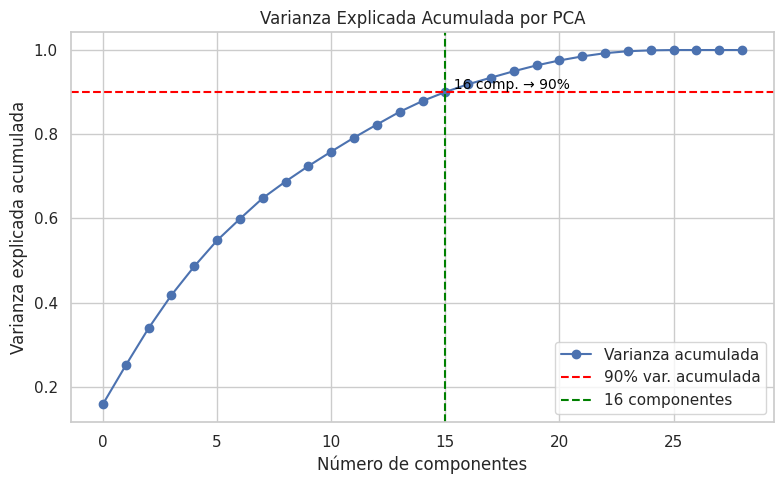

Número óptimo de componentes: 16
shape of X_train (7655, 29)
[1.58981999e-01 9.20296978e-02 8.82172555e-02 7.85831929e-02
 6.81231237e-02 6.17469912e-02 5.12580326e-02 4.92704023e-02
 3.94465210e-02 3.66854040e-02 3.44008706e-02 3.31792980e-02
 3.11067807e-02 3.01809148e-02 2.56856849e-02 2.14379442e-02
 1.84265152e-02 1.56515531e-02 1.52563083e-02 1.39053884e-02
 1.16758005e-02 9.65870346e-03 7.61485954e-03 4.69380829e-03
 2.02553528e-03 7.57414488e-04 7.27529594e-18 6.81274752e-18
 1.41618695e-18]
suma: 0.9003341134975857


In [ ]:
k_optimo, X_train_pre, pca_full = graficar_varianza_pca(
    preprocessor=preprocessor,
    X_train=X_train,
    porcentaje=0.90
)

print("Número óptimo de componentes:", k_optimo)

print("shape of X_train", X_train_pre.shape)

expl = pca_full.explained_variance_ratio_
print(expl)

print('suma:', sum(expl[0:k_optimo]))

In [ ]:
def entrenar_con_pca(
    mejores_modelos=None,
    preprocessor=None,
    X_train=None,
    y_train=None,
    X_test=None,
    y_test=None,
    resultados_compilados=None,
    k=None
):
    """
    Entrena los modelos indicados en 'mejores_modelos' usando un pipeline:
        preprocessor -> PCA(n_components=k) -> modelo

    Si no se pasan 'mejores_modelos' o 'k', toma por defecto:
        mejores_modelos = top2_nombres
        k = k_optimo

    IMPORTANTE:
    - Se asume que existe un diccionario global `model_registry`
      que mapea nombre de modelo -> instancia del modelo.
    """

    # Usar valores por defecto si no se pasan
    if mejores_modelos is None:
        mejores_modelos = top2_nombres  # lista ['Random_Forest_Classifier', 'K-Nearest_Neighbors', ...]
    if k is None:
        k = k_optimo

    if preprocessor is None:
        raise ValueError("Debes pasar el 'preprocessor'.")
    if X_train is None or y_train is None or X_test is None or y_test is None:
        raise ValueError("Debes pasar X_train, y_train, X_test, y_test.")
    if resultados_compilados is None:
        raise ValueError("Debes pasar 'resultados_compilados' (tu diccionario de resultados).")

    pipelines_pca = {}

    for nombre_modelo in mejores_modelos:
        print(f"\nEntrenando {nombre_modelo} con PCA ({k} componentes)...")

        # Usamos model_registry definido fuera (global)
        if nombre_modelo not in model_registry:
            raise ValueError(f"El modelo '{nombre_modelo}' no está en model_registry.")

        base_model = model_registry[nombre_modelo]

        # Pipeline: preprocesado + PCA + modelo
        pipe_pca = Pipeline(steps=[
            ('pre', preprocessor),
            ('pca', PCA(n_components=k)),
            ('model', clone(base_model))
        ])

        # Entrenar
        pipe_pca.fit(X_train, y_train)

        # Guardar pipeline con sufijo _PCA
        nombre_pipeline = f"{nombre_modelo}_PCA"
        pipelines_pca[nombre_pipeline] = pipe_pca

        # Guardar métricas en tu diccionario
        resultados_compilados = guardar_resultados_modelo(
            nombre_modelo=nombre_pipeline,
            resultados_dict=resultados_compilados,
            pipeline_o_grid=pipe_pca,
            X_test=X_test,
            y_test=y_test
        )

    return pipelines_pca, resultados_compilados

In [ ]:
pipelines_pca, resultados_compilados = entrenar_con_pca(
    preprocessor=preprocessor,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    resultados_compilados=resultados_compilados
)


Entrenando Random_Forest_Classifier con PCA (16 componentes)...
 Resultados de 'Random_Forest_Classifier_PCA' guardados.

Entrenando K-Nearest_Neighbors con PCA (16 componentes)...
 Resultados de 'K-Nearest_Neighbors_PCA' guardados.


In [ ]:
df_resultados_final_pca = pd.DataFrame.from_dict(
    resultados_compilados,
    orient='index'
)
print(df_resultados_final_pca)

                                    Accuracy  F1_Score  Precision    Recall  \
Regresion_Logistica_Multiclase      0.492838  0.486956   0.488327  0.492838   
Regresion_Logistica_Multiclase_LDA  0.504115  0.505476   0.511103  0.504115   
Regresion_Logistica_Multiclase_QDA  0.462054  0.442075   0.471701  0.462054   
K-Nearest_Neighbors                 0.597684  0.599054   0.602229  0.597684   
Random_Forest_Classifier            0.661384  0.661431   0.662432  0.661384   
MLPClassifier                       0.576958  0.575021   0.574251  0.576958   
SVC                                 0.593112  0.589528   0.590945  0.593112   
Random_Forest_Classifier_PCA        0.552880  0.552716   0.558095  0.552880   
K-Nearest_Neighbors_PCA             0.536422  0.537148   0.540307  0.536422   

                                                                      Hiperparametros  
Regresion_Logistica_Multiclase      {'C': 1.0, 'class_weight': 'balanced', 'dual':...  
Regresion_Logistica_Multiclase_LD

**UMAP**

In [ ]:
def entrenar_modelos_umap(
    modelos,
    model_registry,
    X_train_umap,
    y_train,
    X_test_umap,
    y_test,
    resultados_compilados
):
    """
    Entrena los modelos indicados usando características ya reducidas por UMAP.
    Se agrega una etapa 'pre' al pipeline, pero NO transforma los datos
    (FunctionTransformer identidad).
    """

    pipelines_umap = {}

    # Etapa 'pre' que no hace nada (para mantener compatibilidad)
    pre_no_op = FunctionTransformer(lambda x: x)

    for nombre_modelo in modelos:
        print(f"\nEntrenando {nombre_modelo} en el espacio UMAP...")

        if nombre_modelo not in model_registry:
            raise ValueError(f"El modelo '{nombre_modelo}' no está en model_registry.")

        base_model = model_registry[nombre_modelo]

        # pipeline: pre (identidad) + model
        pipe_umap = Pipeline(steps=[
            ('pre', pre_no_op),           # << agregado según tu solicitud
            ('model', clone(base_model))
        ])

        # ENTRENAR SOBRE el embedding UMAP
        pipe_umap.fit(X_train_umap, y_train)

        # Guardar pipeline
        nombre_etiqueta = f"{nombre_modelo}_UMAP"
        pipelines_umap[nombre_etiqueta] = pipe_umap

        # Guardar métricas
        resultados_compilados = guardar_resultados_modelo(
            nombre_modelo=nombre_etiqueta,
            resultados_dict=resultados_compilados,
            pipeline_o_grid=pipe_umap,
            X_test=X_test_umap,
            y_test=y_test
        )

    return pipelines_umap, resultados_compilados

In [ ]:
def reducir_dimensionalidad_umap(
    preprocessor,
    X_train,
    y_train=None,
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    supervised=False,
    random_state=42
):
    """
    Aplica el preprocesador y luego UMAP para reducir dimensionalidad.

    Parámetros
    ----------
    preprocessor : ColumnTransformer o Pipeline
        El mismo preprocesador que usas en tus modelos ('pre').
    X_train : DataFrame
        Datos originales de entrenamiento (sin target).
    y_train : Serie o array, opcional
        Etiquetas de entrenamiento. Si supervised=True, se usan para UMAP.
    n_components : int
        Dimensión objetivo (número de componentes UMAP).
    n_neighbors : int
        Número de vecinos en el grafo de UMAP.
    min_dist : float
        Distancia mínima entre puntos en el espacio embebido.
    metric : str
        Métrica de distancia (ej: 'euclidean', 'cosine', etc.).
    supervised : bool
        Si True y se pasa y_train, UMAP será supervisado.
    random_state : int
        Semilla de aleatoriedad.

    Returns
    -------
    reducer : UMAP
        Objeto UMAP ya ajustado (fit).
    X_train_umap : DataFrame
        Datos de entrenamiento en el espacio reducido (columnas: UMAP_1, UMAP_2, ...).
    pre_clonado : preprocessor clonado
        Preprocesador ajustado sobre X_train (para usar luego con X_test).
    """

    # 1. Clonar y ajustar preprocesador (no tocamos el original)
    pre_clonado = clone(preprocessor)
    X_train_pre = pre_clonado.fit_transform(X_train, y_train)

    # 2. Crear UMAP
    reducer = UMAP(
        n_components=n_components,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric,
        random_state=random_state
    )

    # 3. Ajustar UMAP (supervisado o no)
    if supervised and y_train is not None:
        embedding = reducer.fit_transform(X_train_pre, np.asarray(y_train))
    else:
        embedding = reducer.fit_transform(X_train_pre)

    # 4. Devolver como DataFrame con nombres bonitos
    cols = [f"UMAP_{i+1}" for i in range(n_components)]
    X_train_umap = pd.DataFrame(embedding, columns=cols, index=X_train.index)

    return reducer, X_train_umap, pre_clonado

In [ ]:
reducer_umap, X_train_umap, pre_clonado = reducir_dimensionalidad_umap(
    preprocessor=preprocessor,
    X_train=X_train,
    y_train=y_train,
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    supervised=True
)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [104]:
def entrenar_modelos_umap(
    modelos,
    model_registry,
    X_train_umap,
    y_train,
    X_test_umap,
    y_test,
    resultados_compilados
):
    """
    Entrena los modelos indicados en 'modelos' usando las características ya
    reducidas por UMAP (X_train_umap, X_test_umap) y actualiza resultados_compilados.

    Cada modelo se entrena en un Pipeline muy simple:
        ('model', modelo)

    y se guarda en resultados_compilados con sufijo '_UMAP'.
    """

    pipelines_umap = {}

    for nombre_modelo in modelos:
        print(f"\nEntrenando {nombre_modelo} en el espacio UMAP...")

        if nombre_modelo not in model_registry:
            raise ValueError(f"El modelo '{nombre_modelo}' no está en model_registry.")

        base_model = model_registry[nombre_modelo]

        # Pipeline solo con el modelo (ya estamos en el espacio UMAP)
        pipe_umap = Pipeline(steps=[
            ('pre', preprocessor),
            #('umap', UMAP(n_neighbors=15)),
            ('model', clone(base_model))
        ])

        pipe_umap.fit(X_train_umap, y_train)

        nombre_etiqueta = f"{nombre_modelo}_UMAP"
        pipelines_umap[nombre_etiqueta] = pipe_umap

        # Guardar métricas usando X_test_umap
        resultados_compilados = guardar_resultados_modelo(
            nombre_modelo=nombre_etiqueta,
            resultados_dict=resultados_compilados,
            pipeline_o_grid=pipe_umap,
            X_test=X_test_umap,
            y_test=y_test
        )

    return pipelines_umap, resultados_compilados

In [ ]:

pipelines_umap, resultados_compilados = entrenar_modelos_umap(
    modelos=top2_nombres,           # ['Random_Forest_Classifier', 'K-Nearest_Neighbors']
    model_registry=model_registry,
    X_train_umap=X_train,
    y_train=y_train,
    X_test_umap=X_test,
    y_test=y_test,
    resultados_compilados=resultados_compilados
)



Entrenando Random_Forest_Classifier en el espacio UMAP...
 Resultados de 'Random_Forest_Classifier_UMAP' guardados.

Entrenando K-Nearest_Neighbors en el espacio UMAP...
 Resultados de 'K-Nearest_Neighbors_UMAP' guardados.


In [ ]:
df_resultados_final_umap = pd.DataFrame.from_dict(
    resultados_compilados,
    orient='index'
)

print(df_resultados_final_umap)

                                    Accuracy  F1_Score  Precision    Recall  \
Regresion_Logistica_Multiclase      0.492838  0.486956   0.488327  0.492838   
Regresion_Logistica_Multiclase_LDA  0.504115  0.505476   0.511103  0.504115   
Regresion_Logistica_Multiclase_QDA  0.462054  0.442075   0.471701  0.462054   
K-Nearest_Neighbors                 0.597684  0.599054   0.602229  0.597684   
Random_Forest_Classifier            0.661384  0.661431   0.662432  0.661384   
MLPClassifier                       0.576958  0.575021   0.574251  0.576958   
SVC                                 0.593112  0.589528   0.590945  0.593112   
Random_Forest_Classifier_PCA        0.552880  0.552716   0.558095  0.552880   
K-Nearest_Neighbors_PCA             0.536422  0.537148   0.540307  0.536422   
Random_Forest_Classifier_UMAP       0.661384  0.661431   0.662432  0.661384   
K-Nearest_Neighbors_UMAP            0.597684  0.599054   0.602229  0.597684   

                                                   